# LENET ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

# import os
# os.environ['KMP_DUPLICATE_LIB_OK']="TRUE"

In [2]:
import tensorflow
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation

2.6.0


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split = 0.2)
train_data=train.flow_from_directory(directory = 'datasets/train',target_size=(224,224),
                                     batch_size=32,class_mode='categorical')

Found 4000 images belonging to 20 classes.


In [4]:
test=ImageDataGenerator(rescale=1./255)
test_data=test.flow_from_directory(directory = 'datasets/test',target_size=(224,224),
                                   batch_size=32,class_mode='categorical')

Found 2000 images belonging to 20 classes.


In [5]:
MODEL=Sequential()
MODEL.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(3,3), input_shape=(224,224,3), padding=('valid'), activation='relu'))
MODEL.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
MODEL.add(Convolution2D(filters=128, kernel_size=(3,3), strides=(3,3), padding=('valid'), activation='relu'))
MODEL.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
MODEL.add(Flatten())
MODEL.add(Dense(256, activation='relu'))
MODEL.add(Dense(20, activation='softmax'))

OPT    = tensorflow.keras.optimizers.Adam(0.001)

MODEL.compile(optimizer=OPT,loss='categorical_crossentropy',metrics=["accuracy", tensorflow.keras.metrics.Precision(), tensorflow.keras.metrics.Recall()])
MODEL.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 74, 74, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1179904   
_________________________________________________________________
dense_1 (Dense)              (None, 20)                5

In [6]:
model_path = "LENET.h5"

from tensorflow.keras.callbacks import ModelCheckpoint

M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

In [9]:
epochs = 100
batch_size = 32

In [10]:
WORKING = MODEL.fit_generator(
           train_data, steps_per_epoch=train_data.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_data,validation_steps=test_data.samples // batch_size,
           callbacks=[M])

Epoch 1/100
125/125 [==============================] - 92s 736ms/step - loss: 2.8838 - accuracy: 0.1170 - precision: 0.9833 - recall: 0.0148 - val_loss: 2.7070 - val_accuracy: 0.1769 - val_precision: 0.9875 - val_recall: 0.0398

Epoch 00001: accuracy improved from -inf to 0.11700, saving model to LENET.h5
Epoch 2/100
125/125 [==============================] - 77s 613ms/step - loss: 2.6797 - accuracy: 0.1842 - precision: 0.9075 - recall: 0.0393 - val_loss: 2.6032 - val_accuracy: 0.2147 - val_precision: 0.8462 - val_recall: 0.0444

Epoch 00002: accuracy improved from 0.11700 to 0.18425, saving model to LENET.h5
Epoch 3/100
125/125 [==============================] - 78s 623ms/step - loss: 2.5544 - accuracy: 0.2375 - precision: 0.8932 - recall: 0.0460 - val_loss: 2.4655 - val_accuracy: 0.2601 - val_precision: 0.8000 - val_recall: 0.0585

Epoch 00003: accuracy improved from 0.18425 to 0.23750, saving model to LENET.h5
Epoch 4/100
125/125 [==============================] - 76s 611ms/step - l


Epoch 00027: accuracy improved from 0.76175 to 0.77950, saving model to LENET.h5
Epoch 28/100
125/125 [==============================] - 81s 650ms/step - loss: 0.6912 - accuracy: 0.7878 - precision: 0.8827 - recall: 0.7000 - val_loss: 0.4558 - val_accuracy: 0.8669 - val_precision: 0.9417 - val_recall: 0.7984

Epoch 00028: accuracy improved from 0.77950 to 0.78775, saving model to LENET.h5
Epoch 29/100
125/125 [==============================] - 78s 623ms/step - loss: 0.6181 - accuracy: 0.8073 - precision: 0.8977 - recall: 0.7285 - val_loss: 0.4399 - val_accuracy: 0.8684 - val_precision: 0.9317 - val_recall: 0.8039

Epoch 00029: accuracy improved from 0.78775 to 0.80725, saving model to LENET.h5
Epoch 30/100
125/125 [==============================] - 77s 614ms/step - loss: 0.6336 - accuracy: 0.8092 - precision: 0.8975 - recall: 0.7310 - val_loss: 0.3877 - val_accuracy: 0.8821 - val_precision: 0.9404 - val_recall: 0.8357

Epoch 00030: accuracy improved from 0.80725 to 0.80925, saving mod


Epoch 00083: accuracy did not improve from 0.95325
Epoch 84/100
125/125 [==============================] - 77s 615ms/step - loss: 0.1396 - accuracy: 0.9553 - precision: 0.9624 - recall: 0.9482 - val_loss: 0.0697 - val_accuracy: 0.9773 - val_precision: 0.9837 - val_recall: 0.9728

Epoch 00084: accuracy improved from 0.95325 to 0.95525, saving model to LENET.h5
Epoch 85/100
125/125 [==============================] - 76s 609ms/step - loss: 0.1385 - accuracy: 0.9600 - precision: 0.9668 - recall: 0.9528 - val_loss: 0.0722 - val_accuracy: 0.9783 - val_precision: 0.9837 - val_recall: 0.9728

Epoch 00085: accuracy improved from 0.95525 to 0.96000, saving model to LENET.h5
Epoch 86/100
125/125 [==============================] - 76s 607ms/step - loss: 0.1565 - accuracy: 0.9475 - precision: 0.9551 - recall: 0.9410 - val_loss: 0.0651 - val_accuracy: 0.9768 - val_precision: 0.9812 - val_recall: 0.9738

Epoch 00086: accuracy did not improve from 0.96000
Epoch 87/100
125/125 [=======================

In [11]:
WORKING.history.keys()


dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

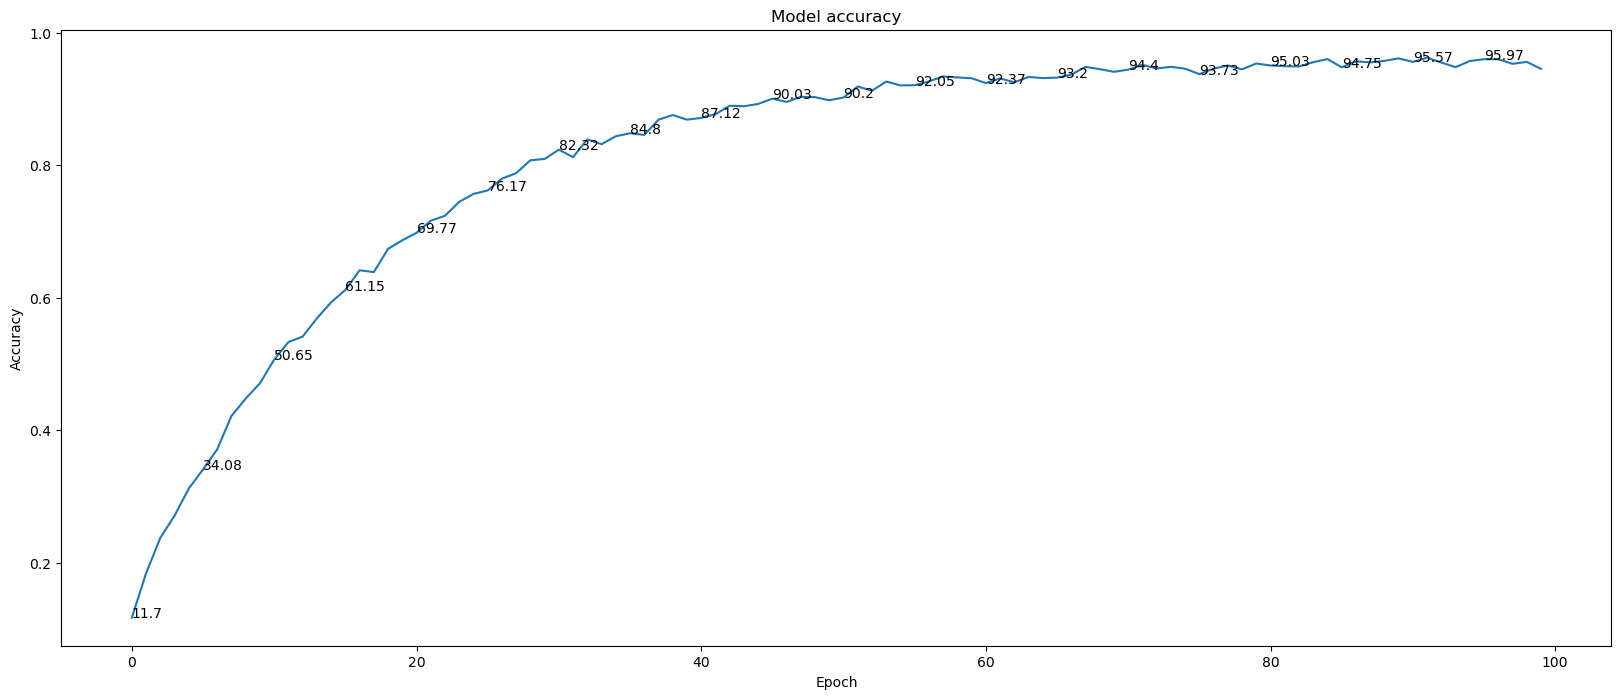

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
plt.plot(WORKING.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(WORKING.history['accuracy'][i]*100,2),xy=(i,WORKING.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

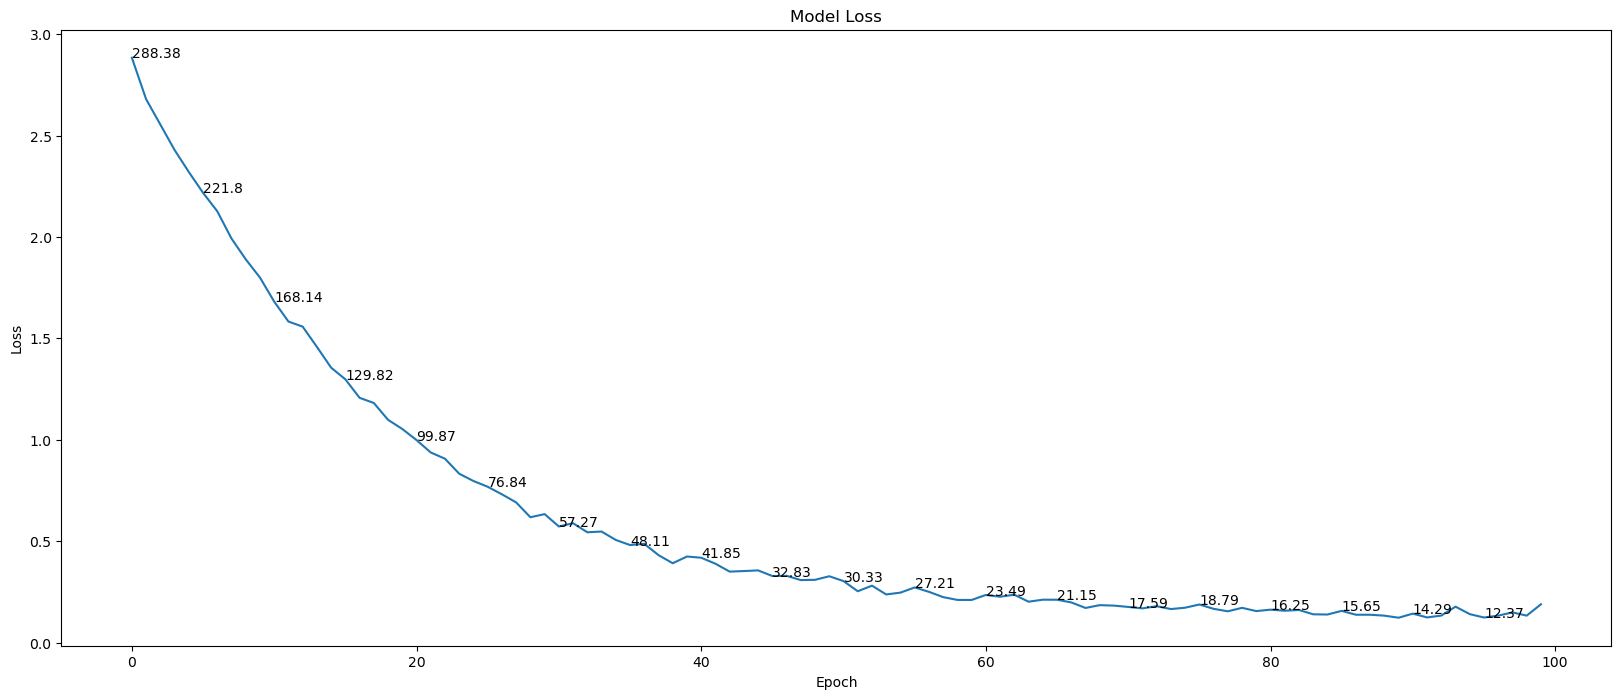

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(WORKING.history['loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(WORKING.history['loss'][i]*100,2),xy=(i,WORKING.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()